<a href="https://www.kaggle.com/code/priyankamukulsharma/binary-classification-pima-indian-diabetes?scriptVersionId=98052631" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

While working on Iris Dataset we worked on a balanced dataset (also it was a multiclass classification). Now we will work on an slightly imbalanced dataset.
I have choosen pima-indians-diabetes-database for this notebook.
We will apply the ML lifecycle to this dataset.
Collecting Data -->EDA-->Feature Engineering-->Modelling-->Evaluating model-->Deployment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%config Completer.use_jedi = False
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from pandas_profiling import ProfileReport
import scipy.stats
%matplotlib inline
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# **Collecting Data**

In [2]:
dataset=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# **EDA of the dataset.**

# We can use pandas_profiling to get overall information about the dataset.

In [3]:
file=ProfileReport(dataset)
file.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# For blood pressure lets perform the Shapiro-Wilk test of normality. The null hypothesis (Ho) is that the data is normal.

In [4]:
from scipy.stats import  shapiro
stat, p = shapiro(dataset['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


The p-value is less then .005 so we reject our null hypothesis.

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

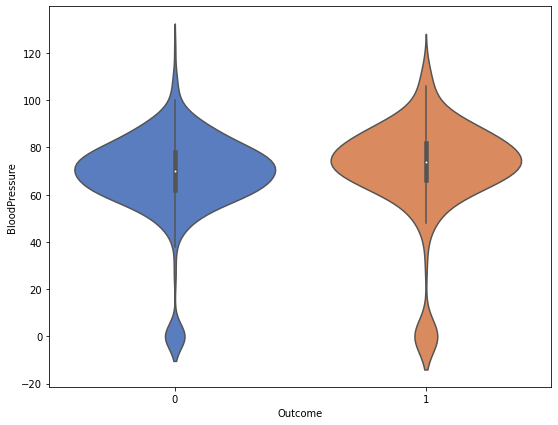

In [5]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(x='Outcome',y='BloodPressure',data=dataset,split=True,palette='muted')


In [6]:
#Replacing the zero-values for Blood Pressure
df1 = dataset.loc[dataset['Outcome'] == 1]
df2 = dataset.loc[dataset['Outcome'] == 0]

In [7]:
#Looking at the dataset
dataset.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
dataset.shape

(768, 9)

In [9]:
from scipy.stats import pearsonr

coerr,_= pearsonr(dataset['Age'],dataset['Pregnancies'])
coerr

0.544341228402339

**This dataset has 768 rows and 9 columns.**

In [10]:
from scipy import stats

z=np.abs(stats.zscore(dataset))
print(z)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.692891  0.204013   
1       0.844885  1.123396       0.160546       0.530902  0.692891  0.684422   
2       1.233880  1.943724       0.263941       1.288212  0.692891  1.103255   
3       0.844885  0.998208       0.160546       0.154533  0.123302  0.494043   
4       1.141852  0.504055       1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813  0.622642       0.356432       1.722735  0.870031  0.115169   
764     0.547919  0.034598       0.046245       0.405445  0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.735190   
766     0.844885  0.159787       0.470732       1.288212  0.692891  0.240205   
767     0.844885  0.873019       0.046245       0.656358  0.692891  0.202129   

     DiabetesPedigreeFunction       Age

In [11]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


In [12]:
dataset = dataset[(z < 3).all(axis=1)]
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    int64  
 1   Glucose                   688 non-null    int64  
 2   BloodPressure             688 non-null    int64  
 3   SkinThickness             688 non-null    int64  
 4   Insulin                   688 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    int64  
 8   Outcome                   688 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


In [14]:
#We have no categorial data in this dataset.

In [15]:
'''
for  i in 768:
   [dataset.loc[i]==0]
   print(a)
   i=i+1
'''


'\nfor  i in 768:\n   [dataset.loc[i]==0]\n   print(a)\n   i=i+1\n'

In [16]:
# Let's check for the null values
dataset.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in this dataset but there are lot of 0s in the dataset.Lets convert them in NANs.

In [17]:
dataset_1=dataset.copy(deep=True)
dataset_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=dataset_1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)
dataset_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
5,5,116,74,NaN,NaN,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70,27.0,NaN,36.8,0.340,27,0
765,5,121,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60,NaN,NaN,30.1,0.349,47,1


To remove the NANs lets visualize the data distribution.

In [18]:
dataset_1.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               190
Insulin                     324
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

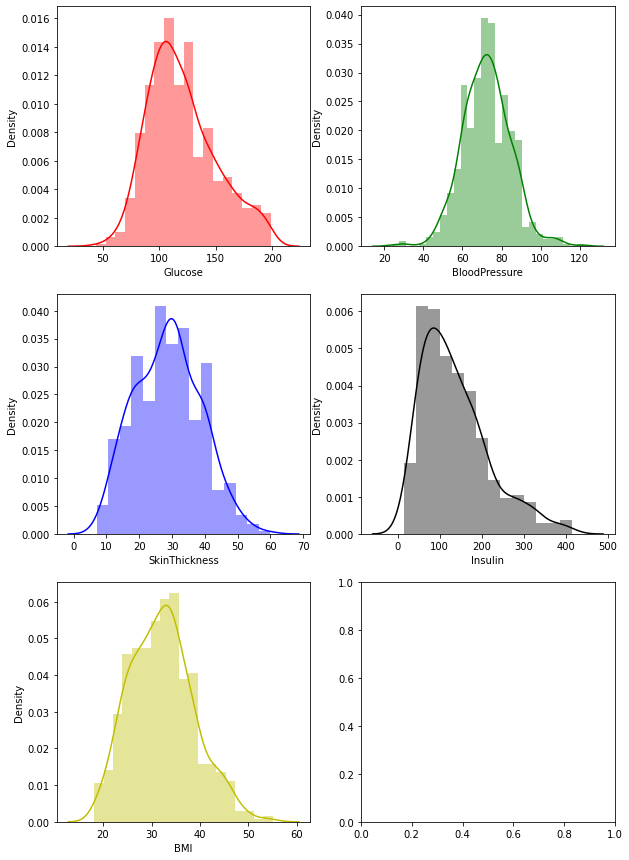

In [19]:
fig,ax=plt.subplots(3,2,figsize=(10,15))
Glucose=dataset_1['Glucose'].dropna()
sns.distplot(Glucose,color='r',ax=ax[0][0])
BloodPressure=dataset_1['BloodPressure'].dropna()
sns.distplot(BloodPressure,color='g',ax=ax[0][1])
SkinThickness=dataset_1['SkinThickness'].dropna()
sns.distplot(SkinThickness,color='b',ax=ax[1][0])
Insulin=dataset_1['Insulin'].dropna()
sns.distplot(Insulin,color='k',ax=ax[1][1])
BMI=dataset_1['BMI'].dropna()
sns.distplot(BMI,color='y',ax=ax[2][0])
#No required as there is no null value Pregnancies=dataset_1['Pregnancies'].dropna()
#sns.distplot(Pregnancies,color='m',ax=ax[2][1])

Imputing NAN values in accordence to their distribution

In [20]:
dataset_1['Glucose'].fillna(dataset_1['Glucose'].mean(),inplace=True)
dataset_1['BloodPressure'].fillna(dataset_1['BloodPressure'].mean(),inplace=True)
dataset_1['SkinThickness'].fillna(dataset_1['SkinThickness'].median(),inplace=True) # as their are outliers median will be used to fill values
dataset_1['Insulin'].fillna(dataset_1['Insulin'].median(),inplace=True)
dataset_1['BMI'].fillna(dataset_1['BMI'].median(),inplace=True )  
#dataset_1['Pregnancies'].fillna(dataset_1['Pregnancies'].mean(),inplace=True ) 


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

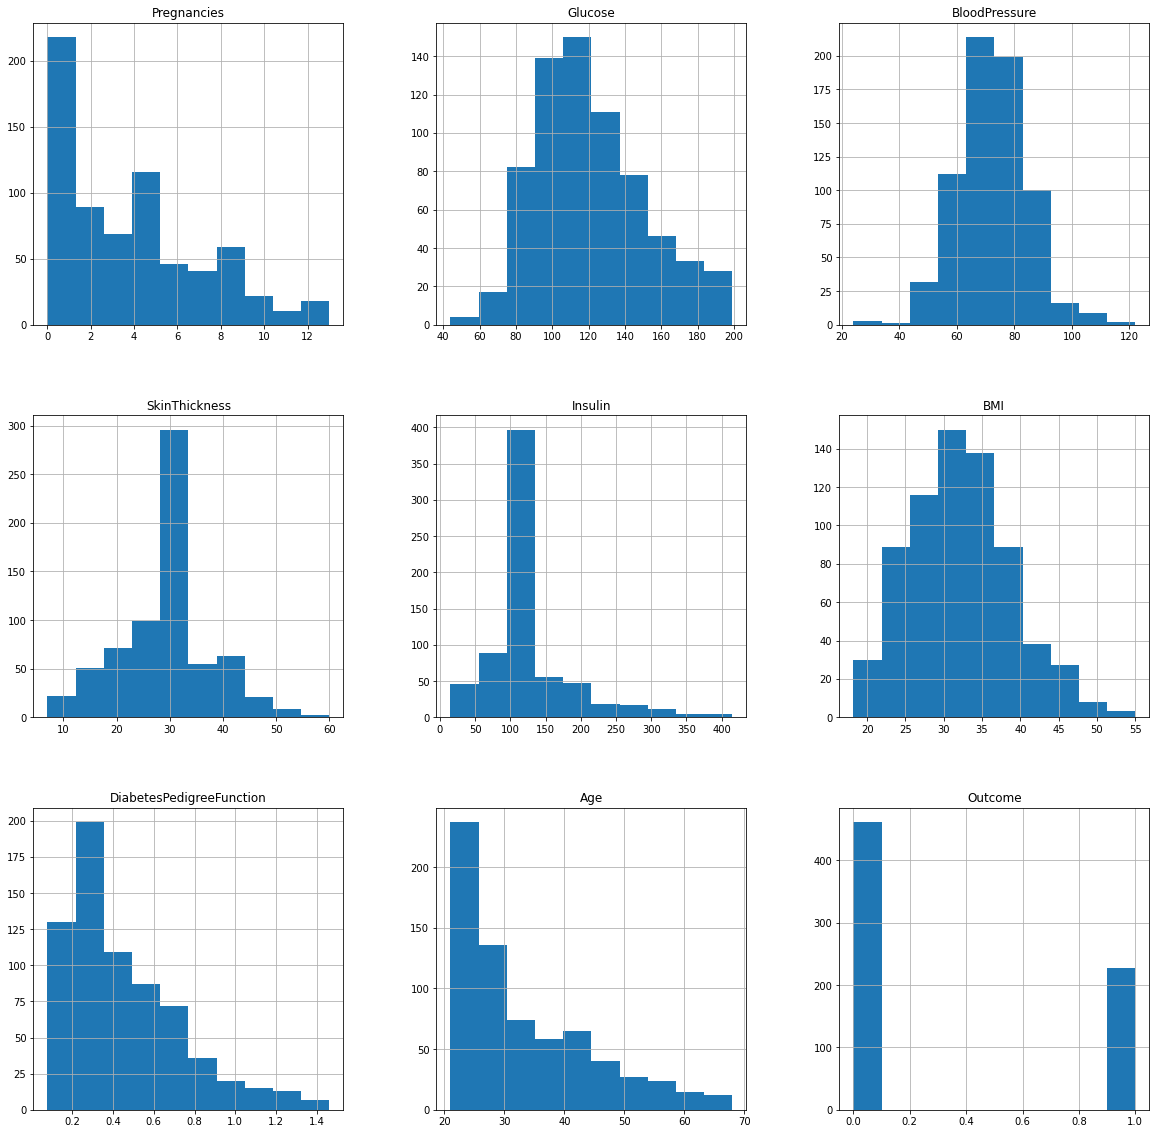

In [21]:
dataset_1.hist(figsize=(20,20))

In [22]:
dataset_1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now looking at the target variable.

array([<AxesSubplot:ylabel='Outcome'>], dtype=object)

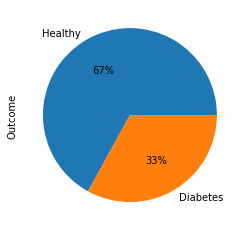

In [23]:
labels=['Healthy','Diabetes']
dataset_1["Outcome"].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct="%1.0f%%")

This dataset is slightly imbalanced witn ~65:35 ratio.

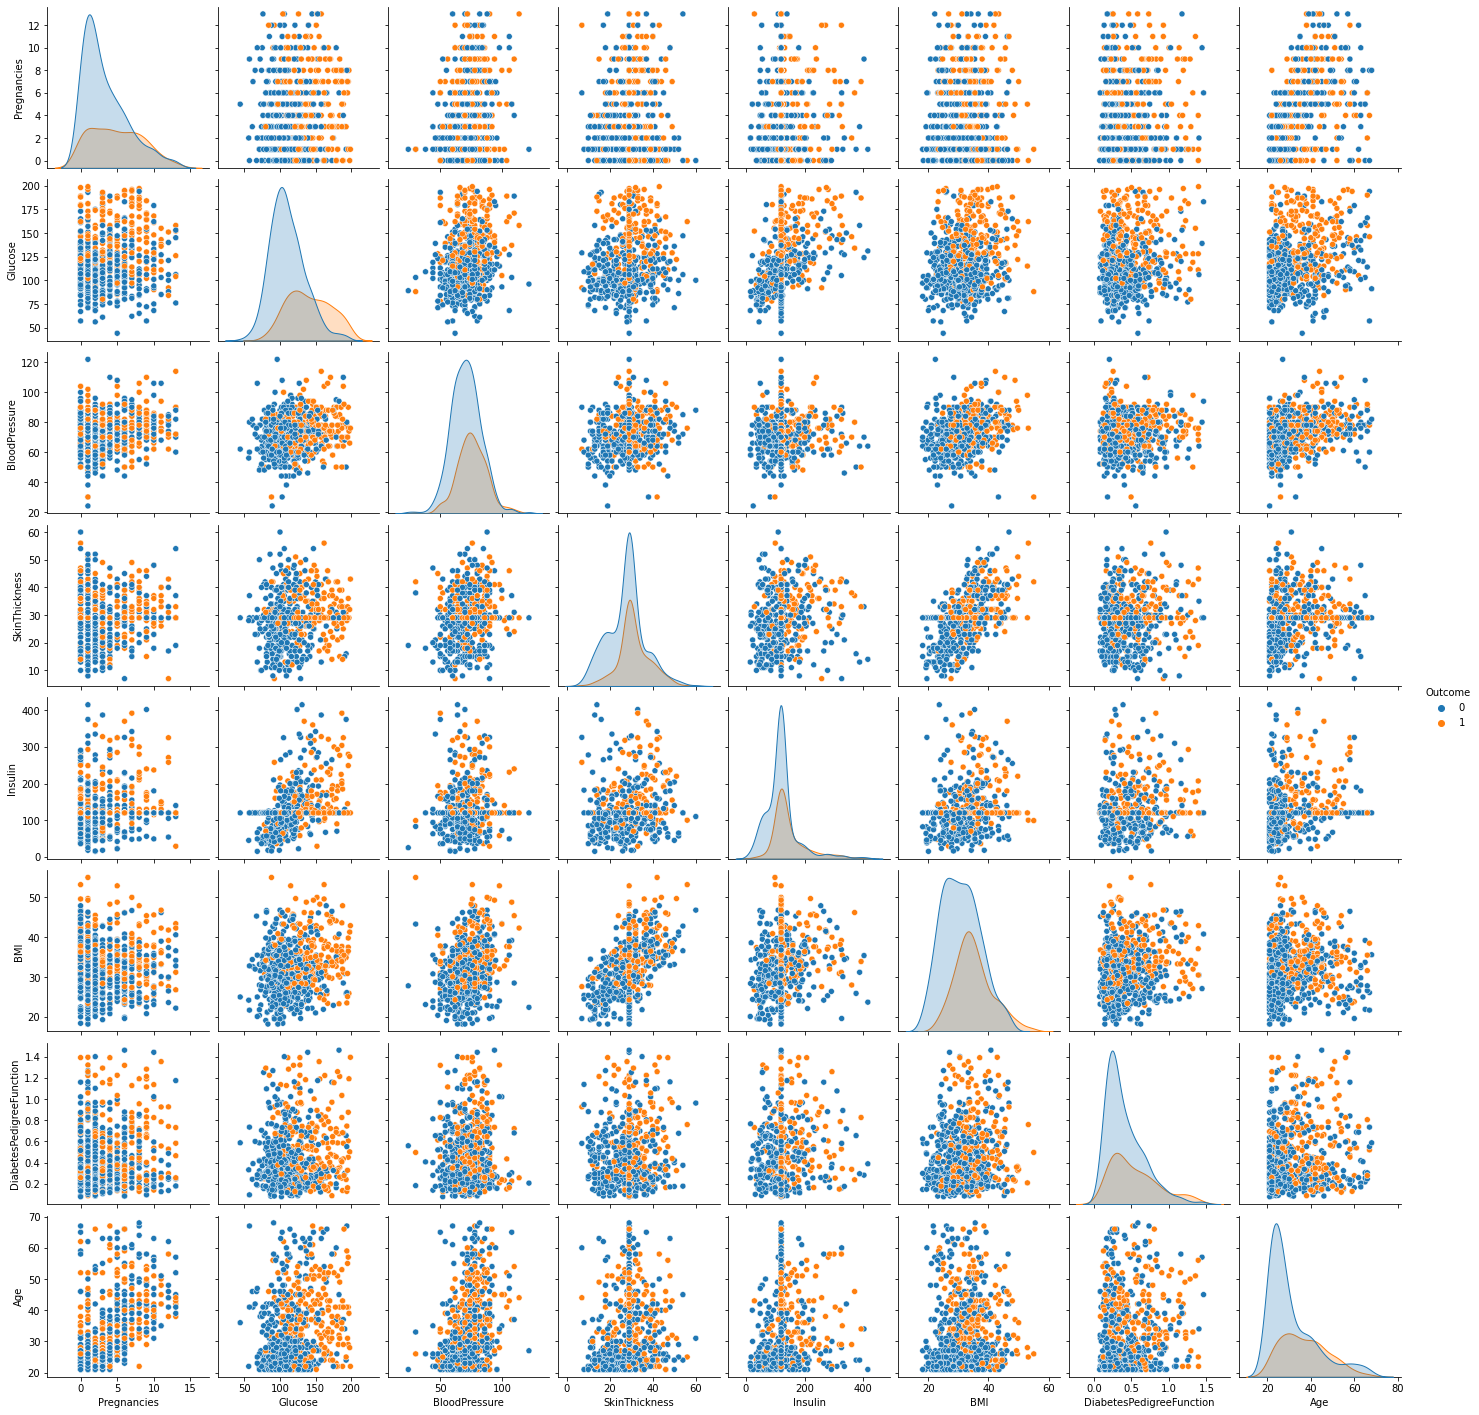

In [24]:
sns.pairplot(dataset_1,hue='Outcome')

SkinThickness and BMI seem to have linear relationship.

Lets have a look at the corelation between the variables.

In [25]:
corr=dataset_1.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.156470,0.229881,0.114088,0.078728,0.043549,0.015522,0.569787,0.226382
Glucose,0.156470,1.000000,0.240560,0.134929,0.416222,0.196665,0.104521,0.266930,0.478614
BloodPressure,0.229881,0.240560,1.000000,0.198498,0.057425,0.274707,0.032757,0.354391,0.182521
SkinThickness,0.114088,0.134929,0.198498,1.000000,0.140019,0.561819,0.065666,0.130196,0.200991
Insulin,0.078728,0.416222,0.057425,0.140019,1.000000,0.181892,0.106295,0.119816,0.218285
BMI,0.043549,0.196665,0.274707,0.561819,0.181892,1.000000,0.125714,0.059980,0.298056
DiabetesPedigreeFunction,0.015522,0.104521,0.032757,0.065666,0.106295,0.125714,1.000000,0.060663,0.213872
Age,0.569787,0.266930,0.354391,0.130196,0.119816,0.059980,0.060663,1.000000,0.246290
Outcome,0.226382,0.478614,0.182521,0.200991,0.218285,0.298056,0.213872,0.246290,1.000000


<AxesSubplot:>

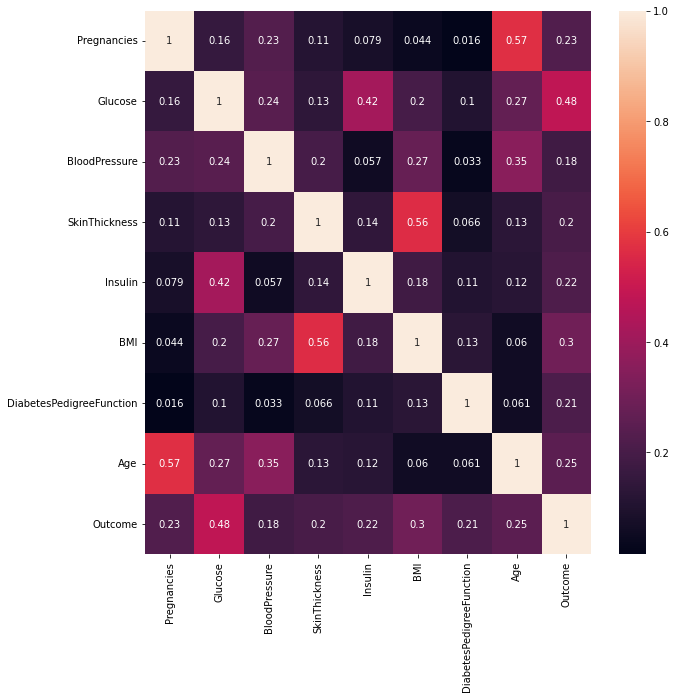

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cbar=True)

There is medium correlation between Pregnancies and Age and Skinthikness and BMI.

# **Credits:
# https://www.kaggle.com/code/ashvanths/diabetesprediction-knn-eda